## DS5220 Homework-03
### KAVANA VENKATESH

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches 
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
from scipy import io
from sklearn.svm import LinearSVC

In [4]:
# Loading datasets 
data = io.loadmat('C:\\Users\\kava2\\Downloads\\ds5220_hw03_data\\hw03_dataset')
X_train = data['X_trn']
x_test = data['X_tst']
Y_train = data['Y_trn']
y_test = data['Y_tst']

In [5]:
# Creating SVM model using sklearn
model = LinearSVC()
svm = model.fit(X_train, Y_train)

C:\Users\kava2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
# Printing the parameters
print("Parameters of the Hyperplane of the Trained SVM are: ",svm.coef_[0],'\n')
print("Accuracy of the Linear SVM on (TRAINING DATA): ",svm.score(X_train, Y_train)*100,"%")
print("Accuracy of the Linear SVM on (TEST DATA): ",svm.score(x_test, y_test)*100,"%",'\n')
print("Classification error of the SVM (TRAINING DATA): ",(1-svm.score(X_train, Y_train))*100,"%")
print("Classification error of the SVM (TEST DATA): ",(1-svm.score(x_test, y_test))*100,"%",'\n') 

Parameters of the Hyperplane of the Trained SVM are:  [ 1.52976104 -0.48494467] 

Accuracy of the Linear SVM on (TRAINING DATA):  97.61904761904762 %
Accuracy of the Linear SVM on (TEST DATA):  100.0 % 

Classification error of the SVM (TRAINING DATA):  2.3809523809523836 %
Classification error of the SVM (TEST DATA):  0.0 % 



In [15]:
def plot_regression(X_set, y_set, title_label):
    X0, X1 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    
    plt.contourf(X0, X1, model.predict(np.array([X0.ravel(), X1.ravel()]).T).reshape(X0.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    
    plt.xlim(X0.min(), X0.max())
    plt.ylim(X1.min(), X1.max())
    x_0 = X_set[np.where(y_set == 0)[0]] 
    x_1 = X_set[np.where(y_set == 1)[0]] 
    
    plt.scatter([x_1[:, 0]], [x_1[:, 1]], c='yellow', label='y = 1',alpha = .7) 
    plt.scatter([x_0[:, 0]], [x_0[:, 1]], c='blue', label='y = 0') 
    plt.title(title_label)
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.legend()
    plt.show()

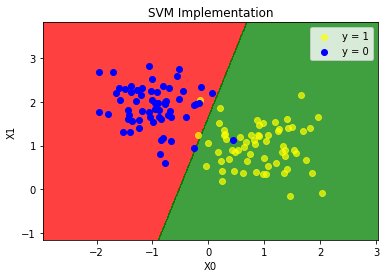

In [16]:
plot_regression(X_train, Y_train, "SVM Implementation")

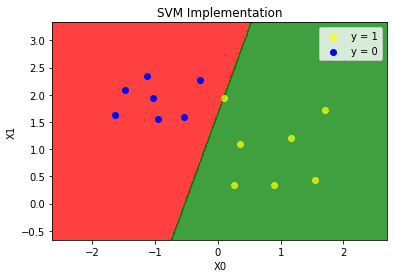

In [17]:
plot_regression(x_test, y_test, "SVM Implementation")